# MIP Search App

Search facility for Museums in the Pandemic project. 
Birkbeck, University of London and King's College London.

Author & maintainer: andrea.ballatore [at] kcl.ac.uk

## Setup
Run this cell only once and the app should keep working for several days. It will take up to 5 minutes to download and install the necessary files. If the page stops working, reload it and run this cell again.

In [5]:
print("Downloading source code...")
!wget -q https://www.dropbox.com/s/at7z91d2lidordi/search_utils.py?dl=1 -O search_utils.py
!wget -q https://www.dropbox.com/s/7jbbewmgdvyh3wa/museums_wattributes-2020-02-23.tsv?dl=1 -O museums_wattributes-2020-02-23.tsv
print("Downloading DB...")
!wget -q https://www.dropbox.com/s/ou2p8vbksz5avvu/mip_corpus_search.db.gz?dl=1 -O mip_corpus_search.db.gz
print("Uncompressing DB...")
!gunzip mip_corpus_search.db.gz
%run search_utils.py

Uncompressing DB...
ok


## Search

Syntax: * means 'any character'

In [28]:
#@title Search corpus { display-mode: "form" }
%run search_utils.py
search_string = "model trains" #@param {type:"string"}
search_string_not = "" #@param {type:"string"}
case_sensitive = False #@param {type:"boolean"}
search_websites = False
search_website_sentences = True #@param {type:"boolean"}
search_facebook = False #@param {type:"boolean"}
search_twitter = True #@param {type:"boolean"}
search_twitter_include_replies = True #@param {type:"boolean"}
museum_name = "" #@param {type:"string"}
museum_governance = "" #@param {type:"string"}
museum_size = "" #@param {type:"string"}
begin_date = "2019-01-01" #@param {type:"date"}
end_date = "2021-11-28" #@param {type:"date"}
max_results =  100#@param {type:"integer"}
context_window =  20#@param {type:"integer"}

res_df = run_search(search_string, search_string_not, case_sensitive,
           search_facebook, search_twitter, search_twitter_include_replies, search_websites, 
           search_website_sentences, 
           museum_name, museum_governance, museum_size, 
           begin_date, end_date)
if len(res_df) > 0:
  results_html, results_page_df = generate_html_matches(res_df, search_string, 
    case_sensitive, context_window, max_results)
  display(HTML(results_html))
#res_df

ok
Date range: 2019-01-01 to 2021-11-28
WEBSITES: 32 matches found. N sessions: 10. Unique museums: 5
TWITTER: 38 matches found. Unique museums: 17
Duplicates removed (from 70 to 55)
search_regex: '(?i)\bmodel trains\b'


/content/search_utils.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['begin_date'] = begin_date


res,museum_id,account,before,match,after,msg_time
22,mm.domus.WM120,BMMuseum,Are you interested in all things,model trains,🚂🚆? Then you'll love the upcoming Great British Model Railway Show on 30-31 October 2021! Find out more and book,2021-09-11
23,mm.domus.WM120,BMMuseum,"Model Railway Show on 30-31 October 2021! 🚂🚆 Sponsored by Hornby Hobbies, this special family-friendly weekend is dedicated to",model trains,and layouts. Find out more and book your tickets now 👇 https://t.co/2020HTFfAU https://t.co/jfIkjM7Q9,2021-08-29
17,mm.domus.SE319,waterandsteam,every Wednesday in August 🎼 Musical Mark is back every Thursday and Sunday at 2pm 📚 Storytelling with Emma every Friday 🚂,Model trains,"Sat 31/Sun 1 Aug and Bank Holiday weekend And much, much more! https://t.co/03Plp2poz",2021-07-24
1,mm.domus.YH123,WFMuseums,of 00 gauge models. Since its release by @Meccano the 00 gauge has remained the most popular scale for,model trains,. #WFToyStorie,2021-07-16
20,mm.domus.SE505,FarmlandMuseum,"Today is Father’s Day! Come and visit out Father’s Day at the Farmland Museum event, with",model trains,", model railroads and a BBQ for our guests! Spend the day with the whole family exploring our site. Reserve",2021-06-20
21,mm.domus.SE505,FarmlandMuseum,"Today is Father’s Day! Come and visit out Father’s Day at the Farmland Museum event, with",model trains,", model railroads and a BBQ for our guests! Spend the day with the whole family exploring our site. Reserve",2021-06-20
19,mm.ace.1246,The_Lowry,"paintings & drawings of this subject after visiting Burton-on-Trent. However, he also claimed that the locomotive was drawn from",model trains,belonging to the son of one of his friends! Find out more about this work on @_smartify. https://t.co/1myL3vnCeb https://t.co/W8MnaFmrm,2021-06-16
18,mm.domus.SE319,waterandsteam,The,model trains,"are ready, see you tomorrow! 😃 #kidsbackinmuseums #halfterm #modelrailway https://t.co/lJIzapG8a",2021-05-28
5,mm.aim.0181,computermuseum,"to get familiar with the new world of ""automated computing"". Today, PIKO is one of the leading brands in",model trains,. #MuseumFromHome Learn more: https://t.co/dCrtKyHzze https://t.co/bNhp3L66f,2021-03-29
11,mm.domus.NW121,BlackburnMuseum,,Model trains,is today's #HobbyMonth hobby! We love this Hornby Electric Train catalogue from our collections. #trains #modeltrains #modelrailways #railways https://t.co/ES5p7dXJp,2021-01-20


# Analyse search results

Run this cell to get an analysis of the composition of search results generated above in terms of museum attributes (governance, size, etc).

ok
Search: "model trains" • Date range: 2019-01-01 to 2021-11-28 • 
N results: 85 • N unique museums: 27


,platform,n_results,museum_id
0,website_sentences,32,5
1,facebook,30,14
2,twitter,23,17


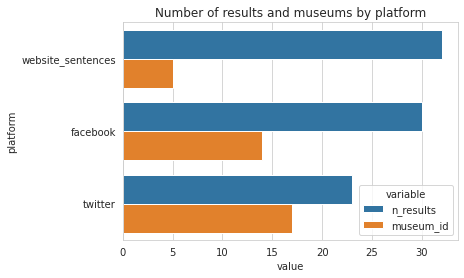

railway (23) model (20) collection (20) museum (16) day (15) toys (14) including (11) 
scale (11) enjoy (11) vintage (11) watching (11) electric (10) large (10) display (10) 
visitors (10) relics (10) clockwork (10) selection (10) addition (10) wide (10) 

model (33) train (19) also (16) hornby (15) museum (14) like (11) set (11) 
station (11) ace (11) trains (11) operation (11) running (11) lgb (10) another (10) 
scale (10) lima (10) play (10) trix (10) much (8) day (8) 



,msg_time,size,session_id
0,2021-03-04,4,2021-03-04
1,2021-04-04,3,2021-04-04
2,2021-05-03,3,2021-05-03
3,2021-06-03,3,2021-06-03
4,2021-07-12,3,2021-07-12
5,2021-08-09,3,2021-08-09
6,2021-09-01,3,2021-09-01
7,2021-09-27,3,2021-09-27
8,2021-10-25,3,2021-10-25
9,2021-11-08,4,2021-11-08


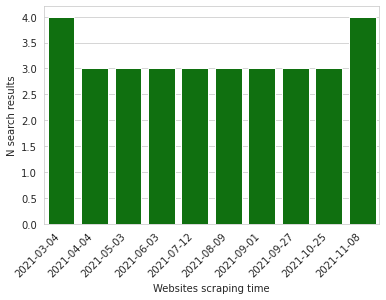

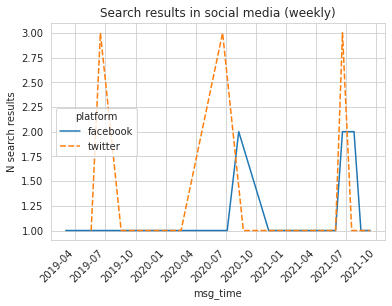

Unique museum results: 36


,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
0,Independent:Not for profit,26,72.2,1534,1.7,45.9,26.3
1,Government:Local Authority,4,11.1,718,0.6,21.5,-10.4
2,Independent:Unknown,3,8.3,113,2.7,3.4,4.9
3,Government:National,1,2.8,69,1.4,2.1,0.7
4,Independent:National Trust,1,2.8,183,0.5,5.5,-2.7
5,Independent:Private,1,2.8,472,0.2,14.1,-11.3


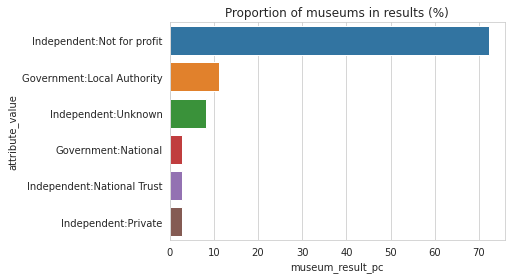

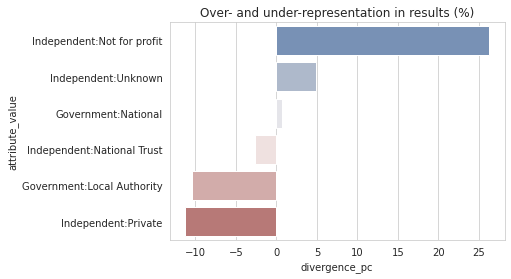

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
6,South East,8,22.2,476,1.7,14.2,8.0
7,North West,6,16.7,247,2.4,7.4,9.3
8,West Midlands,5,13.9,228,2.2,6.8,7.1
9,South West,4,11.1,422,0.9,12.6,-1.5
10,East of England,3,8.3,333,0.9,10.0,-1.7
11,London,3,8.3,238,1.3,7.1,1.2
12,Scotland,2,5.6,494,0.4,14.8,-9.2
13,Yorkshire and The Humber,2,5.6,229,0.9,6.9,-1.3
14,East Midlands,1,2.8,229,0.4,6.9,-4.1
15,North East,1,2.8,105,1.0,3.1,-0.3


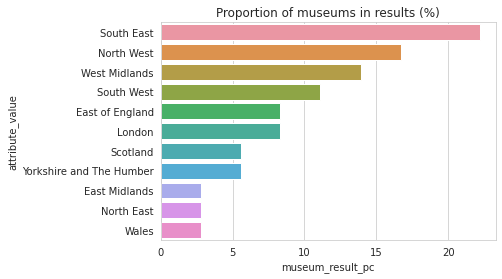

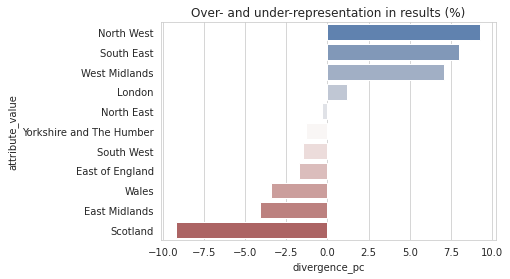

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
17,medium,14,38.9,865,1.6,25.9,13.0
18,small,12,33.3,1825,0.7,54.6,-21.3
19,large,10,27.8,498,2.0,14.9,12.9


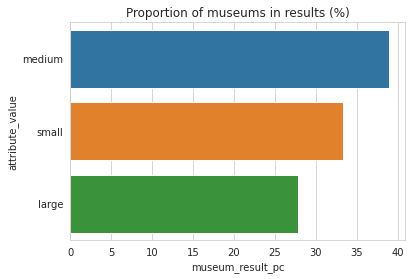

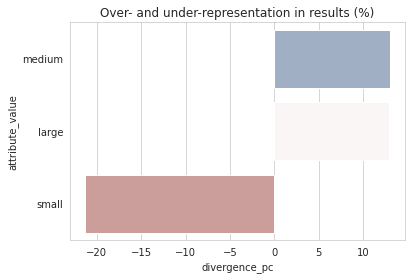

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
20,Transport,15,41.7,224,6.7,6.7,35.0
21,Buildings,5,13.9,553,0.9,16.6,-2.7
22,Local Histories,5,13.9,764,0.7,22.9,-9.0
23,Arts,4,11.1,247,1.6,7.4,3.7
24,Mixed,2,5.6,166,1.2,5.0,0.6
25,Utilities,2,5.6,33,6.1,1.0,4.6
26,Leisure and sport,1,2.8,87,1.1,2.6,0.2
27,Rural Industry,1,2.8,111,0.9,3.3,-0.5
28,Science and technology,1,2.8,21,4.8,0.6,2.2


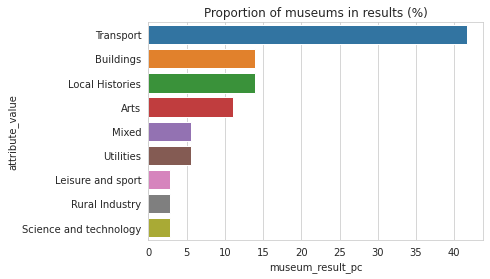

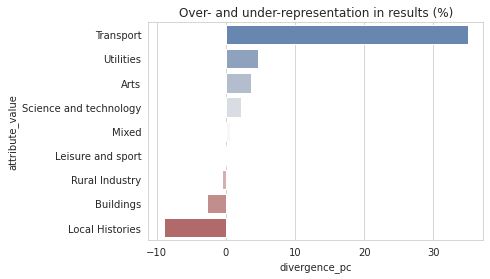

In [19]:
%run search_utils.py
#@title Analysis options { display-mode: "form" }
token_context_size =  10#@param {type:"integer"}
list_before_after_words_limit =  20#@param {type:"integer"}
assert len(res_df) > 0
res_attr_df = an_results(res_df, search_string, case_sensitive, token_context_size, list_before_after_words_limit)
#res_attr_df

### Download results as Excel or CSV

If save as Excel fails, try CSV.

In [ ]:
# click here to download the complete search results as EXCEL
fn = 'search_results_{}.xlsx'.format(get_now_string())
df = results_page_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# click here to download the complete search results as CSV
fn = 'search_results_{}.csv'.format(get_now_string())
df = results_page_df.copy()
df['search'] = search_string
df.to_csv(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# click here to download the attribute analysis of results
fn = 'search_results_attributes_{}.xlsx'.format(get_now_string())
df = res_attr_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Backup application

This is for the platform's developer.

In [ ]:
files.download('search_utils.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>